In [27]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt


In [2]:
crashes = pd.read_csv('data/Crashes.csv') 

In [21]:
crashes.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y,PCT_Fatal
0,6350156,2016,2017-02-11,1942,2016-02-14,1455,35903,2175,7,5,...,0,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.604904,34.177254,0.02815
1,6787200,2015,2016-09-08,1942,2015-01-01,1125,41089,1454,4,5,...,0,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.437806,33.983817,0.02815
2,6787202,2015,2016-09-23,1942,2015-01-06,1745,38380,0852,2,5,...,0,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.460200,34.041935,0.02815
3,6787975,2015,2016-09-23,1942,2015-01-08,1635,31255,0852,4,5,...,1,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.460200,34.041935,0.02815
4,6788094,2015,2016-10-18,1942,2015-01-04,1430,24517,0822,7,5,...,1,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.541559,34.038601,0.02815


In [6]:
crashes.columns.to_list()

['CASE_ID',
 'ACCIDENT_YEAR',
 'PROC_DATE',
 'JURIS',
 'COLLISION_DATE',
 'COLLISION_TIME',
 'OFFICER_ID',
 'REPORTING_DISTRICT',
 'DAY_OF_WEEK',
 'CHP_SHIFT',
 'POPULATION',
 'CNTY_CITY_LOC',
 'SPECIAL_COND',
 'BEAT_TYPE',
 'CHP_BEAT_TYPE',
 'CITY_DIVISION_LAPD',
 'CHP_BEAT_CLASS',
 'BEAT_NUMBER',
 'PRIMARY_RD',
 'SECONDARY_RD',
 'DISTANCE',
 'DIRECTION',
 'INTERSECTION',
 'WEATHER_1',
 'WEATHER_2',
 'STATE_HWY_IND',
 'CALTRANS_COUNTY',
 'CALTRANS_DISTRICT',
 'STATE_ROUTE',
 'ROUTE_SUFFIX',
 'POSTMILE_PREFIX',
 'POSTMILE',
 'LOCATION_TYPE',
 'RAMP_INTERSECTION',
 'SIDE_OF_HWY',
 'TOW_AWAY',
 'COLLISION_SEVERITY',
 'NUMBER_KILLED',
 'NUMBER_INJURED',
 'PARTY_COUNT',
 'PRIMARY_COLL_FACTOR',
 'PCF_CODE_OF_VIOL',
 'PCF_VIOL_CATEGORY',
 'PCF_VIOLATION',
 'PCF_VIOL_SUBSECTION',
 'HIT_AND_RUN',
 'TYPE_OF_COLLISION',
 'MVIW',
 'PED_ACTION',
 'ROAD_SURFACE',
 'ROAD_COND_1',
 'ROAD_COND_2',
 'LIGHTING',
 'CONTROL_DEVICE',
 'CHP_ROAD_TYPE',
 'PEDESTRIAN_ACCIDENT',
 'BICYCLE_ACCIDENT',
 'MOTORCYC

In [29]:
severity_counts = crashes['COLLISION_SEVERITY'].value_counts().sort_index()


In [32]:
total_crashes = severity_counts.sum()
percentages = (severity_counts / total_crashes * 100).round(1)

<BarContainer object of 4 artists>

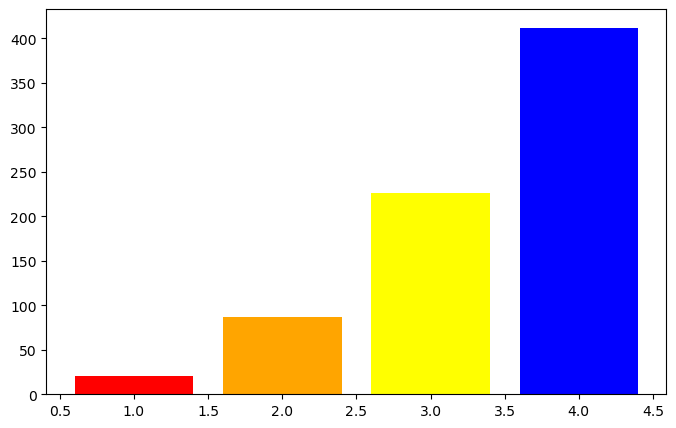

In [30]:
plt.figure(figsize=(8, 5))
plt.bar(severity_counts.index, severity_counts.values, color=['red', 'orange', 'yellow', 'blue'])


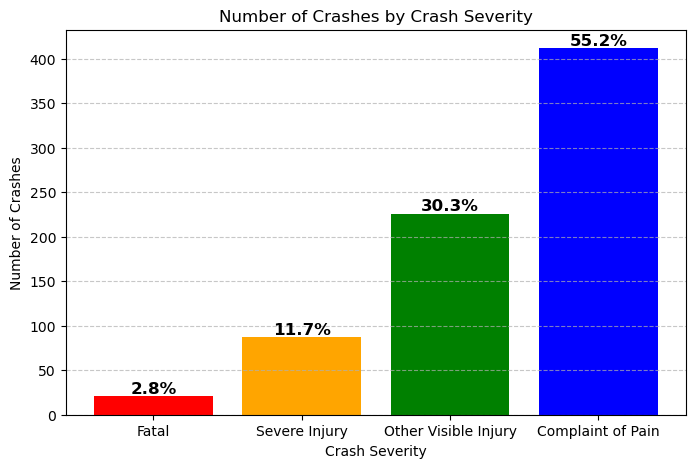

In [34]:
severity_labels = [
    "Fatal", 
    "Severe Injury", 
    "Other Visible Injury", 
    "Complaint of Pain"
]
colors = ['red', 'orange', 'green', 'blue']

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(severity_labels, severity_counts.values, color=colors)

# Add percentage labels on bars
for bar, pct in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{pct}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Formatting
plt.xlabel('Crash Severity')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Crash Severity')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [35]:
collision_type = crashes['TYPE_OF_COLLISION'].value_counts().sort_index()

In [36]:
total_collision_type = collision_type.sum()
percentages = (collision_type / total_crashes * 100).round(1)

In [37]:
collision_type.unique()

array([  5,  77,  65,  70, 392,  25,   1,  85,  26])